In [177]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA
from mne.preprocessing import ICA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline



In [3]:
def SubjFolderSearch(path):
    subjFolders = os.listdir(path)
    AllFolders = []
    for i in subjFolders:
        if '.DS_Store' not in i:
            AllFolders.append(i)
    
    AllFolders_dict = {}
    for eachFolder in AllFolders:
        eachFolderPath = os.path.join(path,eachFolder)
        folderContents = os.listdir(eachFolderPath)
        AllFolders_dict[eachFolder] = [file for file in folderContents if '.set' in file]
       
        
    return AllFolders_dict

In [4]:
#seach all folders and the set files in each folder
path = '/Volumes/flash32/EEGLAB'
AllSetFiles = SubjFolderSearch(path)
print(AllSetFiles)

{'SA20140304': ['20140304_1418.set', '20140304_1614.set'], 'SA20140306': ['20140306_1133.set', '20140306_1338.set']}


In [90]:
# read file
np.random.seed(42)
folder_keys = list(AllSetFiles.keys())      
folder = os.path.join(path,folder_keys[1])

set_file = os.path.join(folder, AllSetFiles[folder_keys[1]][1])
raw = mne.io.read_raw_eeglab(set_file, preload=True, verbose = True)
raw_copy = raw.copy().crop(10,300)

Reading /Volumes/flash32/EEGLAB/SA20140306/20140306_1338.fdt
Reading 0 ... 796266  =      0.000 ...  1555.207 secs...


In [167]:
events = mne.find_events(raw_copy,min_duration=1/raw.info['sfreq'], shortest_event=1)


1072 events found
Event IDs: [  1   2   3   4   5   7   8   9  10  11  13  14  19  20  21  31 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 157 158 159
 160 161 162 163 164]


In [93]:
event_id = {'TRIALSTART':31,
            'LEFTBUTTON':131, # only one button code is sent,
            'RIGHTBUTTON':132, # but it may appear before f2 stim if fast response
            'CONGRUENT':133,# only one congruity code is sent
            'INCONGRUENT':134,
            'CORRECT':129, # only one accuracy code is sent
            #'INCORRECT':130,
            #target
            'BABY_T':135, 
            'BELL_T':136,
            'BIRD_T':137, 
            'BURP_T':138, 
            'DOG_T':139, 
            'DRUM_T':140, 
            'KNOCK_T':141, 
            'LAUGH_T':142, 
            'PHONE_T':143, 
            'TRAIN_T':144,  
            'WATER_T':145,
            #flanker
            #'BABY_F':155, 
            #'BELL_F':156,
            'BIRD_F':157, 
            'BURP_F':158, 
            'DOG_F':159, 
            'DRUM_F':160, 
            'KNOCK_F':161, 
            'LAUGH_F':162, 
            'PHONE_F':163, 
            'TRAIN_F':164,  
            #'WATER_F':165,
            }

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1691 samples (3.303 sec) selected
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-257-df621bb466ad>:8: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epoch.average().plot()


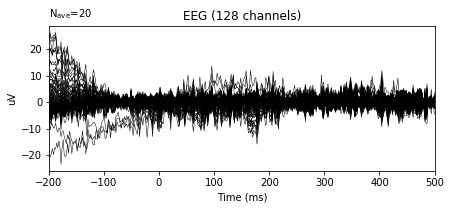

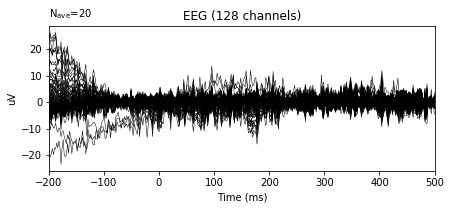

In [257]:
raw_copy.filter(1., None, n_jobs=1, fir_design='firwin')
tmin, tmax = -0.1, 0.3
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')
epoch = mne.Epochs(raw_copy,events,event_id=[135,136],preload=True,picks=picks, baseline=None,
                    verbose=False)

epoch.average().plot()

In [213]:
X = epoch.get_data()

In [258]:
pca = UnsupervisedSpatialFilter(PCA(36), average=False)
pca_data = pca.fit_transform(X)



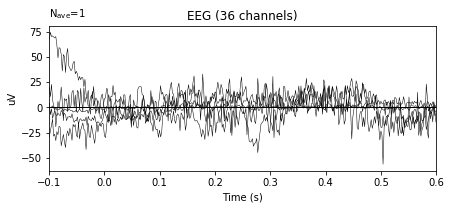

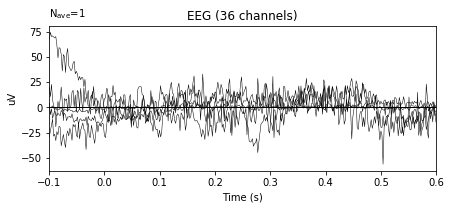

In [259]:
ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(36, epoch.info['sfreq'],
                                     ch_types='eeg'), tmin=tmin)
ev.plot(show=False, window_title="PCA", time_unit='s')

In [225]:
np.mean(pca_data, axis=0)

array([[ 6.70968943e-05,  7.42626766e-05,  7.01693399e-05, ...,
        -2.13374978e-06, -8.30359980e-06, -5.74466258e-06],
       [ 2.00356332e-05,  1.07126092e-05,  2.28314782e-05, ...,
         5.52556062e-06, -5.20193553e-06, -3.21856031e-06],
       [-2.89550097e-05, -2.34373311e-05, -1.75642964e-05, ...,
         2.24529014e-06, -6.15239041e-06, -1.46440494e-05],
       ...,
       [-1.73264560e-20,  6.05438306e-21, -5.75287572e-21, ...,
        -2.45904252e-21, -1.45831942e-21,  1.96008718e-21],
       [-4.38943392e-21,  2.34658732e-21,  5.30574324e-22, ...,
         4.73941404e-21, -7.91826913e-21,  8.39563506e-21],
       [ 9.08740621e-21,  2.77717619e-21,  4.52955832e-21, ...,
        -4.76985428e-21, -7.35247759e-21, -9.35574360e-21]])

In [142]:

X=epoch.get_data()
y = 
pca = UnsupervisedSpatialFilter(PCA(),  average=False)

pca.fit_transform(X)

array([[[-8.19374894e-01, -8.19374894e-01, -8.19374894e-01, ...,
         -8.19374894e-01, -8.19374894e-01, -8.19374894e-01],
        [-2.04701880e-05, -2.33535887e-05, -2.58808687e-05, ...,
          1.05735614e-05,  7.36696370e-06,  2.47950717e-05],
        [-2.91296583e-06,  2.04743559e-06, -7.35444525e-06, ...,
          4.47983318e-05,  5.67617323e-05,  9.03562409e-05],
        ...,
        [ 4.13060265e-16,  3.89475588e-16,  5.55601337e-16, ...,
          8.47532975e-16,  7.49635680e-16,  7.42279503e-16],
        [-6.24291795e-17, -6.61631754e-17, -1.43030670e-17, ...,
          6.67189051e-17,  4.54829966e-17,  3.03066188e-17],
        [-3.61908103e-17, -3.37851705e-17, -5.00822036e-17, ...,
         -8.00101606e-17, -7.00897571e-17, -6.94130836e-17]],

       [[-8.19374894e-01, -8.19374894e-01, -8.19374894e-01, ...,
         -8.19374894e-01, -8.19374894e-01, -8.19374894e-01],
        [-2.81810118e-05, -2.25275774e-05, -1.76785782e-05, ...,
         -2.89144244e-05, -3.76247139e

TypeError: 'int' object is not callable

In [97]:
picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True, eog=False,
                           stim=False, exclude='bads')

In [132]:
method = 'infomax'



decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23

In [133]:
ica = ICA(n_pca_components=pca,max_pca_components=pca, method=method, random_state=random_state)
print(ica)

<ICA  |  no decomposition, fit (infomax):  samples, no dimension reduction>


In [134]:
ica.fit(epoch,picks=picks_eeg,decim=decim)
print(ica)

Fitting ICA to data using 128 channels (please be patient, this may take a while)


TypeError: '<=' not supported between instances of 'int' and 'PCA'

Transforming to ICA space (5 components)
Zeroing out 0 ICA components


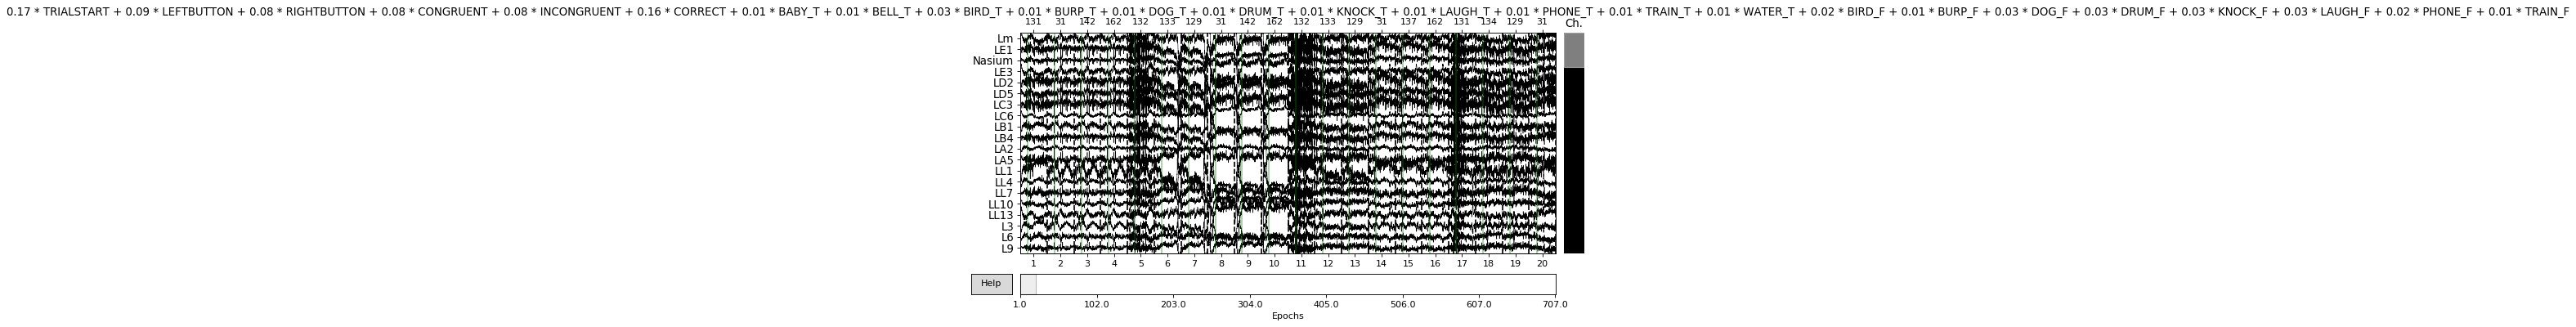

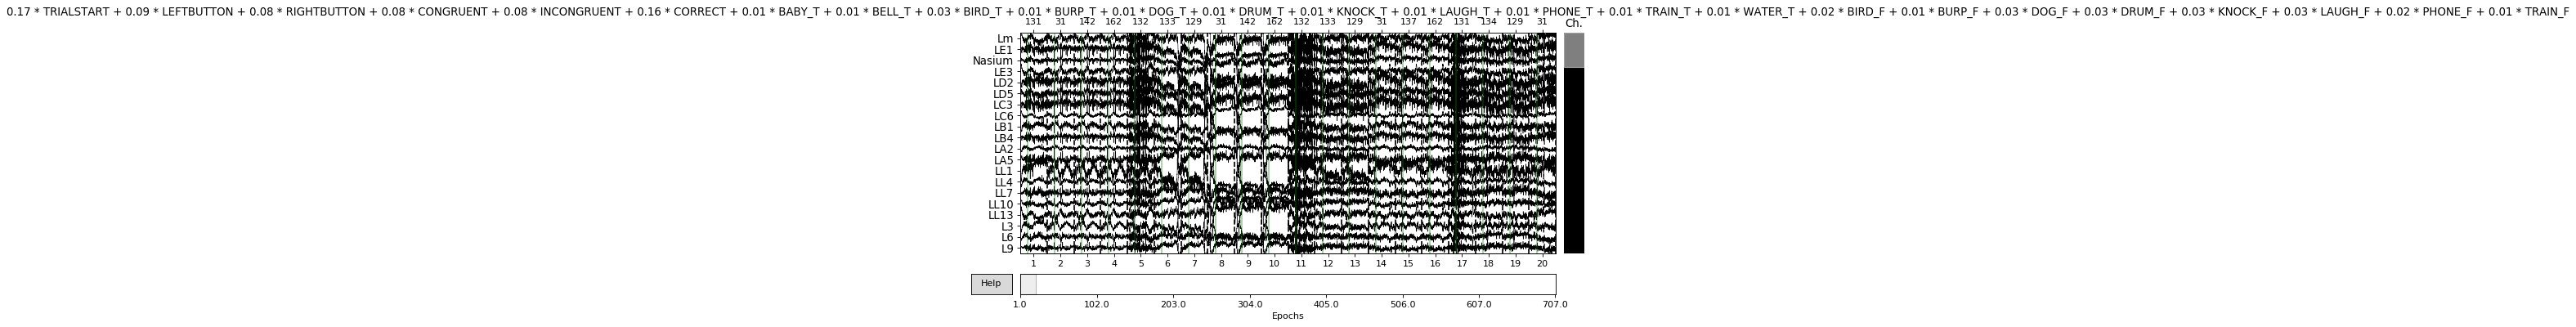

In [120]:
ica.apply(epoch)
epoch.plot()

In [105]:
X=epoch.get_data()
pca = UnsupervisedSpatialFilter(PCA(10), average=False)
pca_data = pca.fit_transform(X)

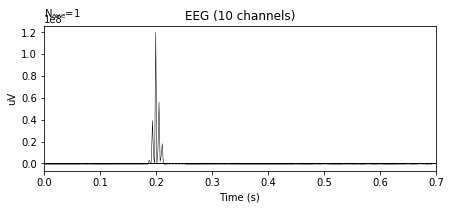

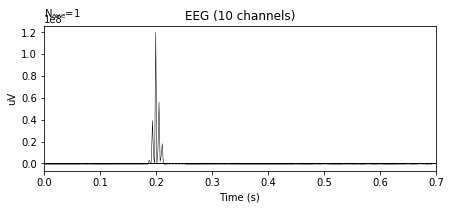

In [103]:
pca = UnsupervisedSpatialFilter(PCA(10), average=False)
pca_data = pca.fit_transform(X)
ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(10, epoch.info['sfreq'],
                                     ch_types='eeg'))
ev.plot(show=False, window_title="PCA", time_unit='s')

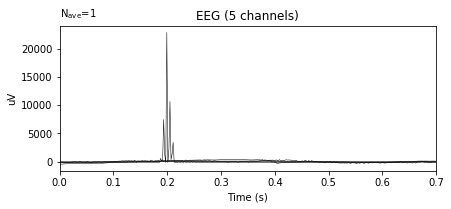

In [116]:
ica = UnsupervisedSpatialFilter(FastICA(5), average=False)
ica_data = ica.fit_transform(X)
ev1 = mne.EvokedArray(np.mean(ica_data, axis=0),
                      mne.create_info(5, epoch.info['sfreq'],
                                      ch_types='eeg'))
ev1.plot(show=False, window_title='ICA', time_unit='s')

plt.show()